In [12]:
import supy as sp
import pandas as pd

path_runcontrol_estm = "./RunControl.nml"
path_runcontrol_ohm = "./RunControl_OHM.nml"

In [2]:
df_state_init_estm = sp.init_supy(path_runcontrol_estm)
df_state_init_ohm = sp.init_supy(path_runcontrol_ohm)

2023-05-16 11:26:40,695 - SuPy - INFO - All cache cleared.
2023-05-16 11:26:41,184 - SuPy - INFO - All cache cleared.


In [3]:
df_state_init_estm.compare(df_state_init_ohm)


var     storageheatmethod      
ind_dim                 0      
                     self other
grid                           
1                       5     1

In [4]:
df_forcing = sp.util.read_forcing(
    "./Input/Saeve_asphalt_2004_data_60.txt", tstep_mod=300
)


In [5]:
df_output_estm, df_state_final_estm = sp.run_supy(
    df_forcing, df_state_init_estm, save_state=False
)
df_output_ohm, df_state_final_ohm = sp.run_supy(
    df_forcing, df_state_init_ohm, save_state=False
)


2023-05-16 11:26:42,249 - SuPy - INFO - ====================
2023-05-16 11:26:42,251 - SuPy - INFO - Simulation period:
2023-05-16 11:26:42,252 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2023-05-16 11:26:42,253 - SuPy - INFO -   End: 2004-04-14 21:00:00
2023-05-16 11:26:42,254 - SuPy - INFO - 
2023-05-16 11:26:42,255 - SuPy - INFO - No. of grids: 1
2023-05-16 11:26:42,257 - SuPy - INFO - SuPy is running in serial mode
2023-05-16 11:26:46,479 - SuPy - INFO - Execution time: 4.2 s
2023-05-16 11:26:46,480 - SuPy - INFO - ====================

2023-05-16 11:26:46,480 - SuPy - INFO - ====================
2023-05-16 11:26:46,480 - SuPy - INFO - Simulation period:
2023-05-16 11:26:46,481 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2023-05-16 11:26:46,481 - SuPy - INFO -   End: 2004-04-14 21:00:00
2023-05-16 11:26:46,482 - SuPy - INFO - 
2023-05-16 11:26:46,482 - SuPy - INFO - No. of grids: 1
2023-05-16 11:26:46,482 - SuPy - INFO - SuPy is running in serial mode
2023-05-16 11:26:48,444 - Su

In [6]:
Ts_ohm = df_output_ohm.loc[1, "ESTMExt"]["Ts_Paved"].resample("H").mean().values
Ts_ehc = df_output_estm.loc[1, "ESTMExt"]["Ts_Paved"].resample("H").mean().values

In [31]:
df_output_ohm.compare(df_output_estm).columns.remove_unused_levels().levels[0]


Index(['debug', 'RSL', 'SUEWS'], dtype='object', name='group')

In [32]:
df_comp = (
    pd.concat(
        {"ohm": df_output_ohm, "ehc": df_output_estm},
        axis=1,
        names=["method", "group", "var"],
    )
    .swaplevel("group", "method", axis=1)
    .swaplevel("var", "method", axis=1)
)


In [39]:
df_Ts_paved = df_comp.loc[1, "debug"].sort_index(axis=1).filter(like="Tsfc_P")

In [44]:
import pandas as pd

ref_df = sp.util.read_suews(
    "./Input/Saeve_asphalt1_2004_ESTM_Ts_data_60.txt",
)
ref_df


,iy,id,it,imin,Tiair,Tsurf,Troof,Troad,Twall,Twall_n,Twall_e,Twall_s,Twall_w
2004-02-12 01:00:00,2004,43,1,0,20,-4.122167,-4.122167,-4.122167,-4.122167,-4.122167,-4.122167,-4.122167,-4.122167
2004-02-12 02:00:00,2004,43,2,0,20,-3.712667,-3.712667,-3.712667,-3.712667,-3.712667,-3.712667,-3.712667,-3.712667
2004-02-12 03:00:00,2004,43,3,0,20,-3.419333,-3.419333,-3.419333,-3.419333,-3.419333,-3.419333,-3.419333,-3.419333
2004-02-12 04:00:00,2004,43,4,0,20,-3.217833,-3.217833,-3.217833,-3.217833,-3.217833,-3.217833,-3.217833,-3.217833
2004-02-12 05:00:00,2004,43,5,0,20,-3.062000,-3.062000,-3.062000,-3.062000,-3.062000,-3.062000,-3.062000,-3.062000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-04-14 17:00:00,2004,105,17,0,20,16.810000,16.810000,16.810000,16.810000,16.810000,16.810000,16.810000,16.810000
2004-04-14 18:00:00,2004,105,18,0,20,14.640000,14.640000,14.640000,14.640000,14.640000,14.640000,14.640000,14.640000
2004-04-14 19:00:00,2004,105,19,0,20,11.385000,11.385000,11.385000,11.385000,11.385000,11.385000,11.385000,11.385000
2004-04-14 20:00:00,2004,105,20,0,20,8.735000,8.735000,8.735000,8.735000,8.735000,8.735000,8.735000,8.735000


(<Figure size 640x480 with 1 Axes>, <Axes: >)

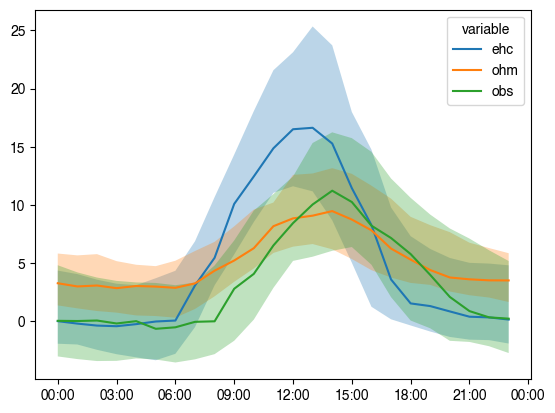

In [57]:
Ts_ref = ref_df["Tsurf"].rename(("Tsfc_Paved", "obs"))
# ref_df["Troad"]

df_ts_comp = (
    pd.concat(
        [df_Ts_paved.resample("h", closed="left", label="right").mean(), Ts_ref],
        axis=1,
    )
    .dropna(axis=0, how="any")
    .droplevel(0, axis=1)
)
sp.util.plot_day_clm(df_ts_comp)

4.4063877130794555
4.4063877130794555


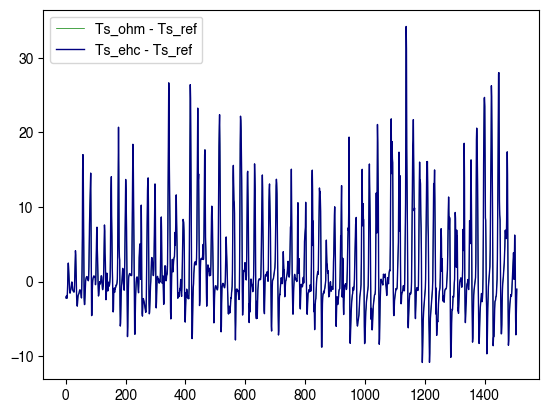

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(Ts_ohm[1:] - Ts_ref, label="Ts_ohm - Ts_ref", color="green", linewidth=0.5)
plt.plot(Ts_ehc[1:] - Ts_ref, label="Ts_ehc - Ts_ref", color="navy", linewidth=1.0)
print(np.mean(np.abs(Ts_ohm[1:] - Ts_ref)))
print(np.mean(np.abs(Ts_ehc[1:] - Ts_ref)))
# plt.plot(Ts_ref, label="Ts_ref", color="red")
plt.legend()
plt.show()

In [11]:
print(np.max(np.abs(Ts_ohm - Ts_ehc)))

0.0
